# Problema do Roteamento de Veículos

In [1]:
import timeit
import matplotlib.pyplot as plt

from ga_vehicle_routing import cities_vr, population_vr
from ga_vehicle_routing import population_fitness_vr
from ga_vehicle_routing import population_switch_mutation_vr, population_partition_mutation_vr
from ga_vehicle_routing import population_ordered_crossover_vr
from ga_vehicle_routing import tournament_selection_vr

## Problema

O problema de roteamento de veículos (VRP, em inglês) é a generalização do problema do caixeiro viajante. Ao invés de termos apenas uma pessoa visitando as cidades, agora podemos ter mais que uma. Dessa forma, partindo de uma cidade inicial, temos agora $n$ veículos percorrendo as cidades, com o objetivo de visitar todas apenas uma vez e minimizando a distância. Note que não necessariamente cada veículo tem que passar por todas as cidades, mas o conjunto de veículos como um todo sim. 

Para esse problema, representamos as soluções como listas de listas, em que a lista maior representa o indivíduo, e as listas contidas nele representam a rota de cada veículo, análogo a representação feita no caixeiro viajante. Por opção, escolhemos excluir a cidade inicial, uma vez que parte da restrição do problema é de que todos os veículos partam e cheguem na mesma cidade inicial.

Os operadores genéticos utilizados foram:
- Switch mutation: cada cidade de uma rota pode ser trocada com outra da mesma rota.

- Partition mutation: cada indivíduo pode ser reparticionado, alterando as cidades que cada veículo vai visitar.

- Ordered crossover: primeiro nós concatenamos as rotas, tornando o indivíduo em uma única lista. Em seguida, selecionamos uma parte dele, e criamos um filho com essa parte. Depois adicionamos as cidades faltando na ordem que elas aparecem no outro indivíduo parental, e por fim, particionamos o filho da mesma forma que seu indivíduo parental original.

- Tournament selection: selecionamos aleatoriamente uma certa quantidade de indivíduos na população e o melhor fitness desse subconjunto é selecionado.

A função objetivo desse problema é a distância total percorrida entre os veículos, ou seja:
\begin{equation}
f(X) = \sum_{x\in X} d_x
\end{equation}
Em que  $d_x$ é a distância percorrida pelo veículo $x$ na solução $X$.

## Teste

Inicialmente, vamos testar nosso código com um problema de 20 cidades e 3 veículos.

In [2]:
NUM_CITIES = 10
NUM_VEHICLES = 3

GENERATIONS = 200
COORD_MAX = 100
POPULATION_SIZE = 1000
TOURNAMENT_INDIVIDUALS = 3
CROSSOVER_RATE = 0.1
SWITCH_MUTATION_RATE = 0.1
ROUTE_MUTATION_RATE = 0.5
PARTITION_MUTATION_RATE = 0.1

CITIES = cities_vr(NUM_CITIES, COORD_MAX)

In [3]:
population = population_vr(POPULATION_SIZE, NUM_CITIES, NUM_VEHICLES)
hof = []

start = timeit.default_timer()

for _ in range(GENERATIONS):
    #Fitness calculation and selection
    fitness = population_fitness_vr(population, CITIES)
    selected_population = tournament_selection_vr(population, fitness, TOURNAMENT_INDIVIDUALS)
    
    #Crossover
    crossover_population = population_ordered_crossover_vr(selected_population, CROSSOVER_RATE)
    
    #Switch mutation
    switch_mutated_population = population_switch_mutation_vr(crossover_population, SWITCH_MUTATION_RATE, 
                                                              ROUTE_MUTATION_RATE)
    partition_mutated_population = population_partition_mutation_vr(switch_mutated_population, 
                                                                    PARTITION_MUTATION_RATE)

    
    #HOF atualization
    fitness = population_fitness_vr(partition_mutated_population, CITIES)
    best_fitness = min(fitness)
    index = fitness.index(best_fitness)
    best_individual = partition_mutated_population[index]
    hof.append(best_individual)
        
    #Restarting the population
    population = partition_mutated_population
    
end = timeit.default_timer()

In [4]:
fitness = population_fitness_vr(hof, CITIES)
best_fitness = min(fitness)
index = fitness.index(best_fitness)
solution = hof[index]

print(f'solution: {solution}, fitness={best_fitness}')
print()
print(f'runtime={(end - start):.3f}s')

solution: [[8, 5], [3, 1, 4, 9, 7, 2], [6]], fitness=423.632105946508

runtime=10.299s


Visualizando as rotas encontradas:

In [5]:
x0, y0 = CITIES[0][0], CITIES[0][1] 
x1, y1 = [CITIES[i][0] for i in solution[0]], [CITIES[i][1] for i in solution[0]]
x2, y2 = [CITIES[i][0] for i in solution[1]], [CITIES[i][1] for i in solution[1]]
x3, y3 = [CITIES[i][0] for i in solution[2]], [CITIES[i][1] for i in solution[2]]
labels = [i for i in range(len(CITIES))]

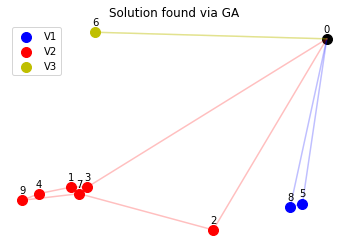

In [6]:
BLUE = 'b'
RED = 'r'
YELLOW = 'y'

plt.scatter(x1, y1, s=100, label='V1', color=BLUE)
plt.scatter(x2, y2, s=100, label='V2', color=RED)
plt.scatter(x3, y3, s=100, label='V3', color=YELLOW)
plt.scatter(x0, y0, s=100, color='k')
plt.annotate(0, (x0, y0), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

#Ploting route 1
for i, label in enumerate(solution[0]):
    plt.annotate(label, (x1[i], y1[i]), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.plot((x0, x1[0]), (y0, y1[0]), color=BLUE, alpha=0.25)
plt.plot((x0, x1[-1]), (y0, y1[-1]), color=BLUE, alpha=0.25)

for i in range(len(solution[0]) - 1):
    plt.plot((x1[i], x1[i+1]), (y1[i], y1[i+1]), color=BLUE, alpha=0.25)

#Ploting route 2
for i, label in enumerate(solution[1]):
    plt.annotate(label, (x2[i], y2[i]), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    
plt.plot((x0, x2[0]), (y0, y2[0]), color=RED, alpha=0.25)
plt.plot((x0, x2[-1]), (y0, y2[-1]), color=RED, alpha=0.25)

for i in range(len(solution[1]) - 1):
    plt.plot((x2[i], x2[i+1]), (y2[i], y2[i+1]), color=RED, alpha=0.25)
    
#Ploting route 3
for i, label in enumerate(solution[2]):
    plt.annotate(label, (x3[i], y3[i]), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.plot((x0, x3[0]), (y0, y3[0]), color=YELLOW, alpha=0.25)
plt.plot((x0, x3[-1]), (y0, y3[-1]), color=YELLOW, alpha=0.25)

for i in range(len(solution[2]) - 1):
    plt.plot((x3[i], x3[i+1]), (y3[i], y3[i+1]), color=YELLOW, alpha=0.25) 
    
plt.title('Solution found via GA')
plt.legend()
plt.axis('off')
plt.show()

Para testarmos se o algoritmo está consistente com as definições acima, vamos rodá-lo 5 vezes e analisarmos os resultados.

In [7]:
for i in range(5):
    population = population_vr(POPULATION_SIZE, NUM_CITIES, NUM_VEHICLES)
    hof = []

    for _ in range(GENERATIONS):
        #Fitness calculation and selection
        fitness = population_fitness_vr(population, CITIES)
        selected_population = tournament_selection_vr(population, fitness, TOURNAMENT_INDIVIDUALS)

        #Crossover
        crossover_population = population_ordered_crossover_vr(selected_population, CROSSOVER_RATE)

        #Switch mutation
        switch_mutated_population = population_switch_mutation_vr(crossover_population, SWITCH_MUTATION_RATE, 
                                                                  ROUTE_MUTATION_RATE)
        partition_mutated_population = population_partition_mutation_vr(switch_mutated_population, 
                                                                        PARTITION_MUTATION_RATE)

        #HOF atualization
        fitness = population_fitness_vr(partition_mutated_population, CITIES)
        best_fitness = min(fitness)
        index = fitness.index(best_fitness)
        best_individual = partition_mutated_population[index]
        hof.append(best_individual)

        #Restarting the population
        population = partition_mutated_population
        
    fitness = population_fitness_vr(hof, CITIES)
    best_fitness = min(fitness)
    index = fitness.index(best_fitness)
    solution = hof[index]
    print(f'solution in iteration {i}:')
    print(f'{solution}, fitness={best_fitness}')
    print()

solution in iteration 0:
[[5, 8], [3, 1, 4, 9, 7, 2], [6]], fitness=423.632105946508

solution in iteration 1:
[[5, 8], [3, 1, 4, 9, 7, 2], [6]], fitness=423.632105946508

solution in iteration 2:
[[5, 8], [2, 7, 9, 4, 1, 3], [6]], fitness=423.632105946508

solution in iteration 3:
[[5, 8], [2, 7, 9, 4, 1, 3], [6]], fitness=423.632105946508

solution in iteration 4:
[[5, 8], [3, 1, 4, 9, 7, 2], [6]], fitness=423.632105946508



Podemos ver que, neste caso, o algoritmo achou a mesma solução nas 5 iterações. É importante notar que rotas que são inversas das outras resultam na mesma distância total.

## Comparação entre diferentes números de veículos

Por fim, vamos ver o que acontece com as melhores soluções encontradas quando variamos o número de veículos do problema, mantendo ainda o conjunto de cidades utilizado nas análises acima. Vamos variar o número de veículos de 3 até 8, rodando o algoritmo 5 vezes para cada caso.

In [8]:
for NUM_VEHICLES in range(3,8):
    for i in range(5):
        population = population_vr(POPULATION_SIZE, NUM_CITIES, NUM_VEHICLES)
        hof = []
    
        for _ in range(GENERATIONS):
            #Fitness calculation and selection
            fitness = population_fitness_vr(population, CITIES)
            selected_population = tournament_selection_vr(population, fitness, TOURNAMENT_INDIVIDUALS)
    
            #Crossover
            crossover_population = population_ordered_crossover_vr(selected_population, CROSSOVER_RATE)
    
            #Switch mutation
            switch_mutated_population = population_switch_mutation_vr(crossover_population, SWITCH_MUTATION_RATE, 
                                                                      ROUTE_MUTATION_RATE)
            partition_mutated_population = population_partition_mutation_vr(switch_mutated_population, 
                                                                            PARTITION_MUTATION_RATE)
    
            #HOF atualization
            fitness = population_fitness_vr(partition_mutated_population, CITIES)
            best_fitness = min(fitness)
            index = fitness.index(best_fitness)
            best_individual = partition_mutated_population[index]
            hof.append(best_individual)
    
            #Restarting the population
            population = partition_mutated_population
            
        fitness = population_fitness_vr(hof, CITIES)
        best_fitness = min(fitness)
        index = fitness.index(best_fitness)
        solution = hof[index]
        print(f'Number of vehicles: {NUM_VEHICLES}')
        print(f'solution in iteration {i}:')
        print(f'{solution}, fitness={best_fitness}')
        print()

Number of vehicles: 3
solution in iteration 0:
[[3, 1, 4, 9, 7, 2], [8, 5], [6]], fitness=423.632105946508

Number of vehicles: 3
solution in iteration 1:
[[2, 7, 9, 4, 1, 3], [8, 5], [6]], fitness=423.632105946508

Number of vehicles: 3
solution in iteration 2:
[[5, 8], [2, 7, 4, 9, 1, 3], [6]], fitness=423.89286971221526

Number of vehicles: 3
solution in iteration 3:
[[8, 5], [2, 7, 9, 4, 1, 3], [6]], fitness=423.632105946508

Number of vehicles: 3
solution in iteration 4:
[[5, 8], [3, 1, 4, 9, 7, 2], [6]], fitness=423.632105946508

Number of vehicles: 4
solution in iteration 0:
[[6], [3, 1, 4, 9, 7, 2], [5], [8]], fitness=522.6165710392925

Number of vehicles: 4
solution in iteration 1:
[[5], [8], [2, 7, 9, 4, 1, 3], [6]], fitness=522.6165710392925

Number of vehicles: 4
solution in iteration 2:
[[8], [5], [2, 7, 9, 4, 1, 3], [6]], fitness=522.6165710392925

Number of vehicles: 4
solution in iteration 3:
[[6], [3, 1, 4, 9, 7, 2], [8], [5]], fitness=522.6165710392925

Number of vehi

Como podemos ver, a distância total percorrida pelos veículos aumentou conforme aumentamos o número de veículos percorrendo as cidades. Apesar de não termos certeza que em cada iteração obtemos a solução ótima do problema, conseguimos ver que rodando 5 iterações com cada número de veículos, a tendência da distância total aumentar. Isso nos mostra que nem sempre aumentar o número de veículos é benéfico para a logística do nosso problema.